# House Price

## Prepare data

## Import Libararies

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv("train.csv").set_index("Id")
print(df.shape)
df.head(10)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


## Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Leaky columns

In [4]:
((df.isna().sum()).sort_values().tail()) / len(df)

FireplaceQu    0.472603
Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64

In [5]:
df.drop(columns=['Alley','Fence','MiscFeature','PoolQC'], axis=1 , inplace= True)

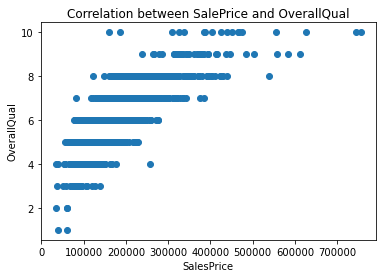

In [6]:
plt.scatter(x=df['SalePrice'] , y=df['OverallQual'])
plt.xlabel("SalesPrice")
plt.ylabel("OverallQual")
plt.title("Correlation between SalePrice and OverallQual");

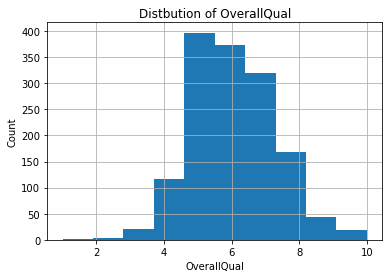

In [7]:
df['OverallQual'].hist()
plt.xlabel('OverallQual')
plt.ylabel('Count')
plt.title("Distbution of OverallQual");

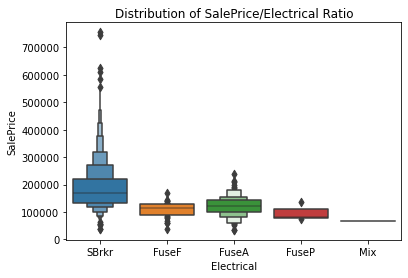

In [8]:
sns.boxenplot(x='Electrical' , y= 'SalePrice' , data=df)
plt.xlabel("Electrical")
plt.ylabel("SalePrice")
plt.title("Distribution of SalePrice/Electrical Ratio");

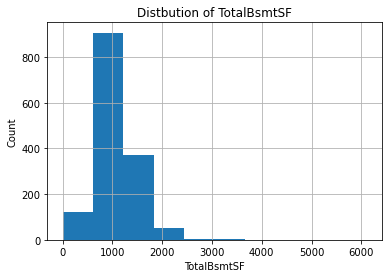

In [9]:
df['TotalBsmtSF'].hist()
plt.xlabel('TotalBsmtSF')
plt.ylabel('Count')
plt.title("Distbution of TotalBsmtSF");

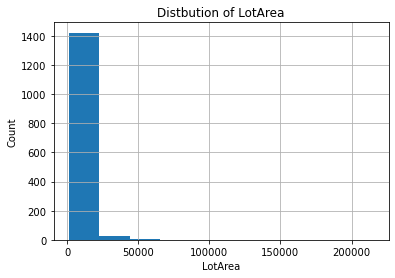

In [10]:
df['LotArea'].hist()
plt.xlabel('LotArea')
plt.ylabel('Count')
plt.title("Distbution of LotArea");

## Multicollinearity

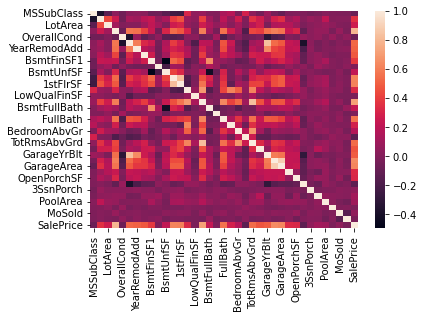

In [11]:
corr = df.corr()
sns.heatmap(corr);

## Split

In [12]:
target = 'SalePrice'
X = df.drop(columns=[target])
y = df[target]

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 75)
y_train shape: (1168,)
X_test shape: (292, 75)
y_test shape: (292,)


## Build Baseline

In [14]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 181441.5419520548
Baseline MAE: 56306.770899793584


## Iterate

In [15]:
clf = make_pipeline(

    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingRegressor(random_state=42)

)

In [16]:
params = {
    
    "simpleimputer__strategy": ["mean","median"],
    "gradientboostingregressor__n_estimators": range(100 , 150 , 5),
    "gradientboostingregressor__max_depth": range(3 , 7 , 1)
    
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingregressor__n_estimators': range(100, 150, 5),
 'gradientboostingregressor__max_depth': range(3, 7)}

In [17]:
model_gbr = GridSearchCV(

    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose= 1

)

In [18]:
model_gbr.fit(X_train , y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': range(3, 7),
                         'gradientboostingregressor__n_estimators': range(100, 150, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [19]:
results = pd.DataFrame(model_gbr.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,1.127878,0.024753,0.048621,0.004805,4,145,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.872507,0.797978,0.857568,0.890262,0.907534,0.865170,0.037552,1
37,1.103854,0.027873,0.047417,0.006136,4,140,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.872455,0.797769,0.857021,0.890419,0.906980,0.864929,0.037544,2
35,1.055979,0.017115,0.048129,0.004319,4,135,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.872832,0.797089,0.856671,0.890810,0.906897,0.864860,0.037852,3
31,1.002434,0.016324,0.046506,0.003822,4,125,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.873523,0.795860,0.856559,0.891192,0.906219,0.864671,0.038233,4
33,1.112742,0.033018,0.043821,0.001465,4,130,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.872856,0.795820,0.856676,0.891396,0.906228,0.864595,0.038243,5
34,1.068361,0.025387,0.043711,0.002463,4,135,mean,"{'gradientboostingregressor__max_depth': 4, 'g...",0.873214,0.794782,0.856919,0.892288,0.905230,0.864486,0.038536,6
29,0.997623,0.082954,0.047712,0.005630,4,120,median,"{'gradientboostingregressor__max_depth': 4, 'g...",0.873133,0.795578,0.856987,0.890903,0.905686,0.864457,0.038143,7
38,1.131682,0.022761,0.048809,0.005473,4,145,mean,"{'gradientboostingregressor__max_depth': 4, 'g...",0.873569,0.793895,0.857531,0.891637,0.905413,0.864409,0.038797,8
36,1.092651,0.016249,0.045962,0.004708,4,140,mean,"{'gradientboostingregressor__max_depth': 4, 'g...",0.873401,0.793470,0.857554,0.891898,0.905335,0.864332,0.038964,9
32,1.180675,0.096086,0.045513,0.004034,4,130,mean,"{'gradientboostingregressor__max_depth': 4, 'g...",0.873073,0.794585,0.856801,0.892119,0.904947,0.864305,0.038521,10


In [20]:
model_gbr.best_params_

{'gradientboostingregressor__max_depth': 4,
 'gradientboostingregressor__n_estimators': 145,
 'simpleimputer__strategy': 'median'}

In [21]:
y_pred_train = model_gbr.predict(X_train)
y_pred_train

array([147737.00469017, 177931.69490249,  92616.33113331, ...,
       120531.32399546, 169260.4949013 , 190892.34973481])

## Evaluate

In [22]:
y_pred_test = model_gbr.predict(X_test)

acc_train = r2_score(y_pred_train , y_train)
acc_test = r2_score(y_pred_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9894
Test Accuracy: 0.8895


## Communication

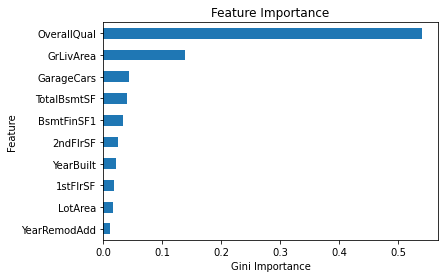

In [23]:
importances = model_gbr.best_estimator_.named_steps['gradientboostingregressor'].feature_importances_
features = X_test.columns
feat_imp = pd.Series(importances , index= features)
feat_imp.sort_values().tail(10).plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## Save Model

In [24]:
with open("model-2" , "wb") as f:
    pickle.dump(model_gbr , f)